## Time Series Forecasting by using ARIMA/SARIMA model


In [1]:

import pandas as pd
# import sys  
# sys.path.insert(0, '../python/')

# import file
# !ln -s ../python/plot_helper.py plot_helper.py
#from plot_helper import plotting

#!ln -s ../python/data_format.py data_format1.py
#from data_format1 import data_format

# d=data_format()
# p=plotting()
file='../Timing Analysis/data/ad_Aug_hourly_advertiser_time.csv'
df=pd.read_csv(file)

df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective','updated_time','website_ctr_link_click'],axis=1)


In [2]:
df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
df=df.rename(columns={'actions_mobile_app_install':'mobile_conv'})
df=df.rename(columns={'actions_omni_app_install':'all_conv'})
df['CR']=round((df.mobile_conv/df.clicks) *100, 2)
df['CTR']=round((df.clicks / df.impressions) * 100,4)
df['CPC']= round(df.spend / df.clicks,2)
df['costPerCon'] = round(df.spend / df.mobile_conv, 2)
df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

df=df.dropna(subset=['time'])
len(df)

2021

In [3]:
df.time=df.time.replace('00:00:00 - 00:59:59',1)
df.time=df.time.replace('01:00:00 - 01:59:59',2)
df.time=df.time.replace('02:00:00 - 02:59:59',3)
df.time=df.time.replace('03:00:00 - 03:59:59',4)
df.time=df.time.replace('04:00:00 - 04:59:59',5)
df.time=df.time.replace('05:00:00 - 05:59:59',6)
df.time=df.time.replace('06:00:00 - 06:59:59',7)
df.time=df.time.replace('07:00:00 - 07:59:59',8)
df.time=df.time.replace('08:00:00 - 08:59:59',9)
df.time=df.time.replace('09:00:00 - 09:59:59',10)
df.time=df.time.replace('10:00:00 - 10:59:59',11)
df.time=df.time.replace('11:00:00 - 11:59:59',12)
df.time=df.time.replace('12:00:00 - 12:59:59',13)
df.time=df.time.replace('13:00:00 - 13:59:59',14)
df.time=df.time.replace('14:00:00 - 14:59:59',15)
df.time=df.time.replace('15:00:00 - 15:59:59',16)
df.time=df.time.replace('16:00:00 - 16:59:59',17)
df.time=df.time.replace('17:00:00 - 17:59:59',18)
df.time=df.time.replace('18:00:00 - 18:59:59',19)
df.time=df.time.replace('19:00:00 - 19:59:59',20)
df.time=df.time.replace('20:00:00 - 20:59:59',21)
df.time=df.time.replace('21:00:00 - 21:59:59',22)
df.time=df.time.replace('22:00:00 - 22:59:59',23)
df.time=df.time.replace('23:00:00 - 23:59:59',24)

In [4]:
# the day should be change into number of the month  and then the hour should be as defined +24*daynumber

df['day']=pd.to_datetime(df['date_start']).dt.day
df['Time']=df['time']+24*(df['day']-1)

### Visualising the time series

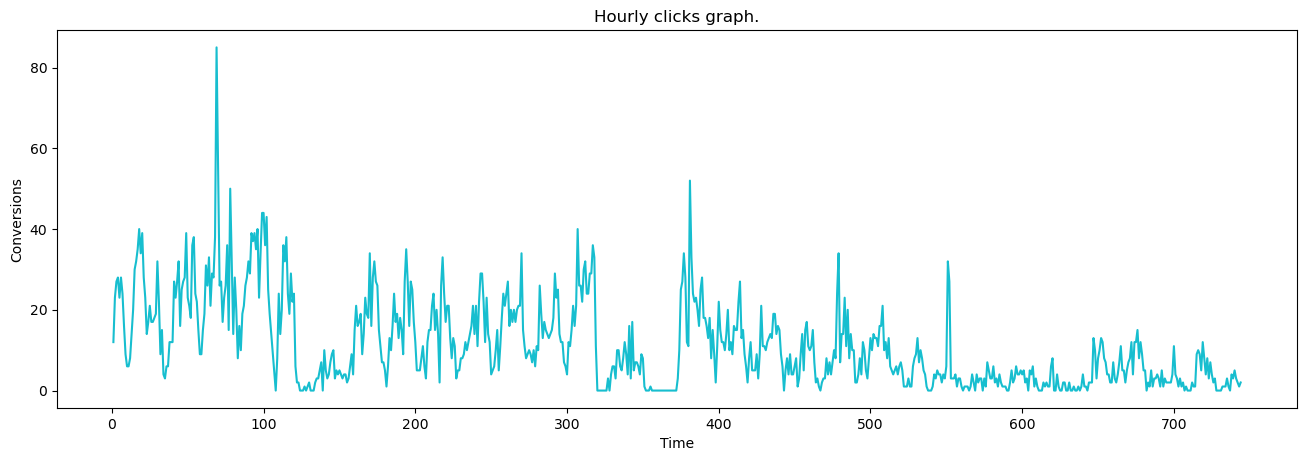

In [8]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
grouped = pd.DataFrame(df.groupby(['day','Time'])['mobile_conv'].sum().reset_index())

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Conversions', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(grouped, x=grouped.Time, y=grouped.mobile_conv, title='Hourly clicks graph.')  

In [9]:
grouped

,day,Time,mobile_conv
0,1,1,12.0
1,1,2,23.0
2,1,3,27.0
3,1,4,28.0
4,1,5,23.0
...,...,...,...
733,31,740,5.0
734,31,741,3.0
735,31,742,2.0
736,31,743,1.0


### Decompose a time series into its componets

In [7]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

# #grouped =grouped.sort_index(inplace=True)
# # Multiplicative Decomposition 
# result_mul = seasonal_decompose(grouped['time'], model='multiplicative', extrapolate_trend=None)

# # Additive Decomposition
# result_add = seasonal_decompose(grouped['time'], model='additive', extrapolate_trend=0)

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

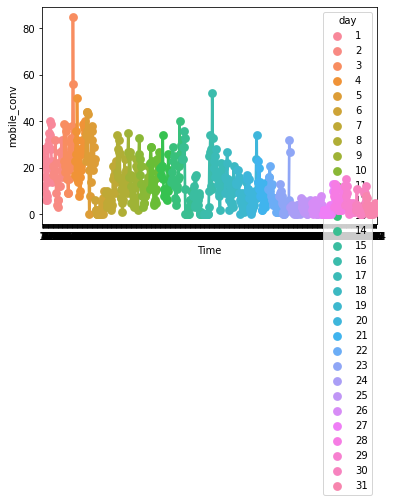

In [11]:
# the analysis should be by date not time but ok 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

grouped = pd.DataFrame(df.groupby(['Time','day'])['mobile_conv'].sum().reset_index())
sns.pointplot(x='Time', y='mobile_conv', hue='day', data=grouped)

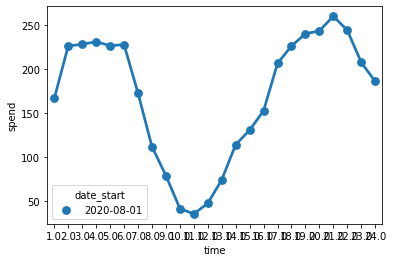

In [8]:
grouped = pd.DataFrame(df.groupby(['time','date_start'])['spend'].sum().reset_index())
sns.pointplot(x='time', y='spend', hue='date_start', data=grouped)

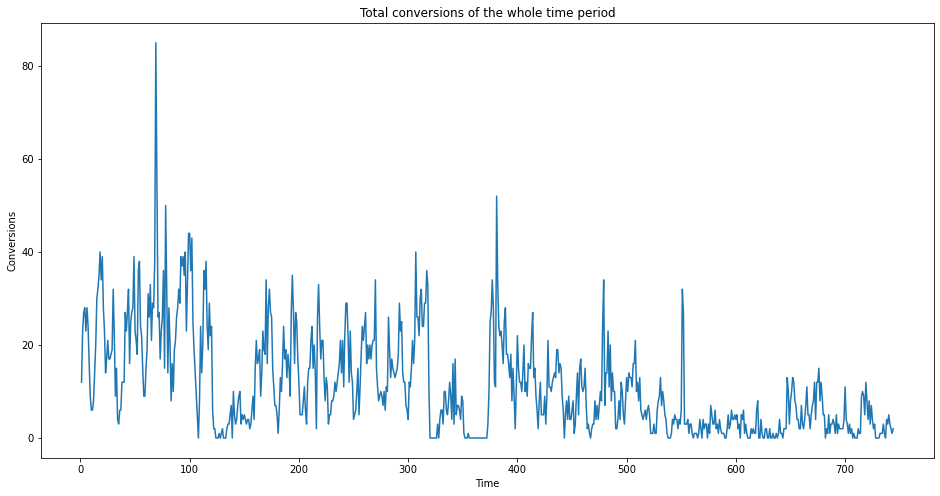

In [12]:
ts=df.groupby(["Time"])["mobile_conv"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total conversions of the whole time period')
plt.xlabel('Time')
plt.ylabel('Conversions')
plt.plot(ts);

In [13]:
df1 = pd.DataFrame(df.groupby(['Time'])['mobile_conv'].sum().reset_index())

count    738.000000
mean      11.322493
std       10.744804
min        0.000000
25%        3.000000
50%        8.000000
75%       17.000000
max       85.000000
Name: mobile_conv, dtype: float64

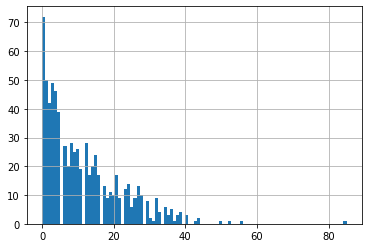

In [14]:
df1.mobile_conv.hist(bins=100)
df1.mobile_conv.describe()

### Check the stasionarity

In [16]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.mobile_conv.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.612774
p-value: 0.090386


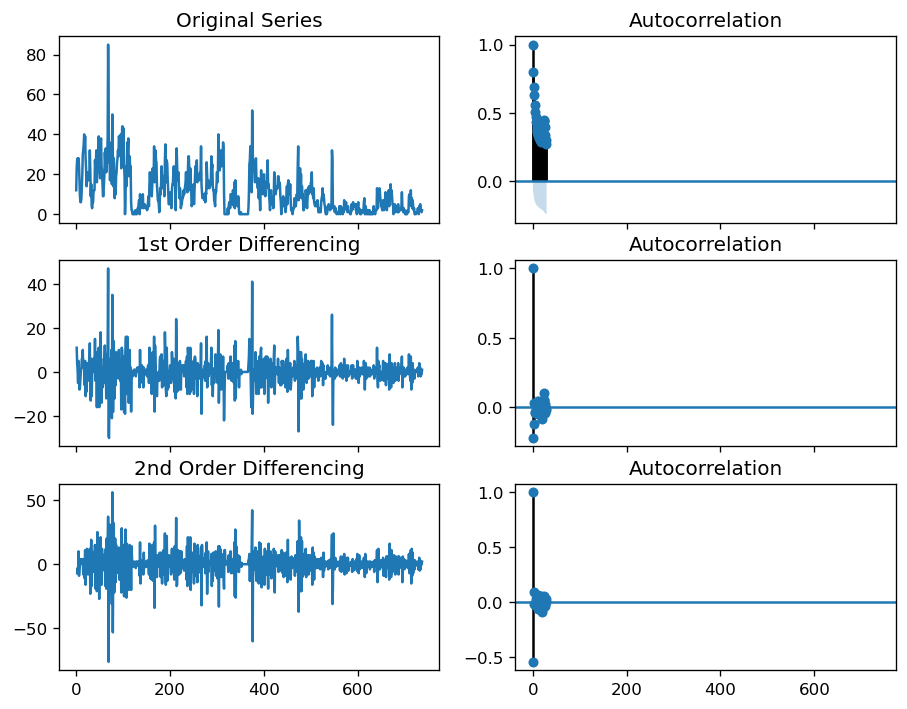

In [17]:
# Since P-value is greater than the significance level, 
#let’s difference the series and see how the autocorrelation plot looks like.

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.mobile_conv); axes[0, 0].set_title('Original Series')
plot_acf(df1.mobile_conv, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1.mobile_conv.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.mobile_conv.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.mobile_conv.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.mobile_conv.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [18]:
# For the above series, the time series reaches stationarity with two orders of differencing.
# so d=2

#testing the stationarity now with the 2nd diff
result1 = adfuller(df1.mobile_conv.diff(2).dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

ADF Statistic: -10.845186
p-value: 0.000000


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


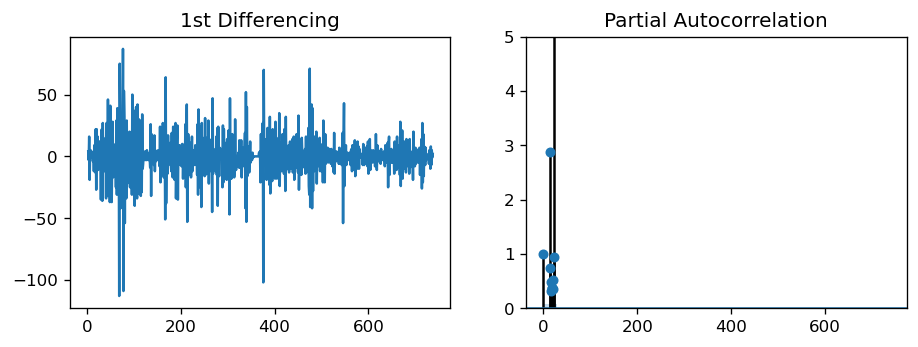

In [19]:
#Find the order of the p term
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.mobile_conv.diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1.mobile_conv.diff().diff().diff().dropna(), ax=axes[1])

plt.show()

#p=2 since the value in the second plot it is inside the significance level (blue area) 

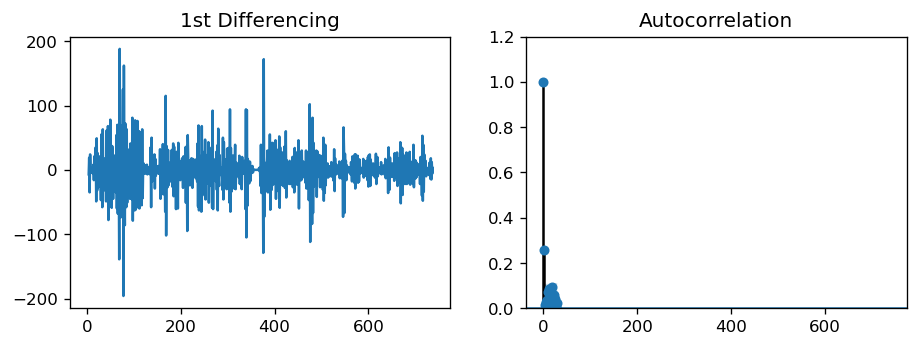

In [20]:
#How to find the q term

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.mobile_conv.diff().diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1.mobile_conv.diff().diff().diff().diff().dropna(), ax=axes[1])

plt.show()
#so q=2

In [21]:
from statsmodels.tsa.arima_model import ARIMA


# 1,1,2 ARIMA Model
model = ARIMA(df1.mobile_conv, order=(3,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.mobile_conv   No. Observations:                  736
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -2423.041
Method:                       css-mle   S.D. of innovations              6.476
Date:                Tue, 19 Jan 2021   AIC                           4860.082
Time:                        13:01:11   BIC                           4892.291
Sample:                             2   HQIC                          4872.504
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.304e-05      0.001     -0.069      0.945      -0.002       0.001
ar.L1.D2.mobile_conv    -1.1869      0.070    -16.999      0.000      -1.324      -1.050
ar.L2.D2.mob

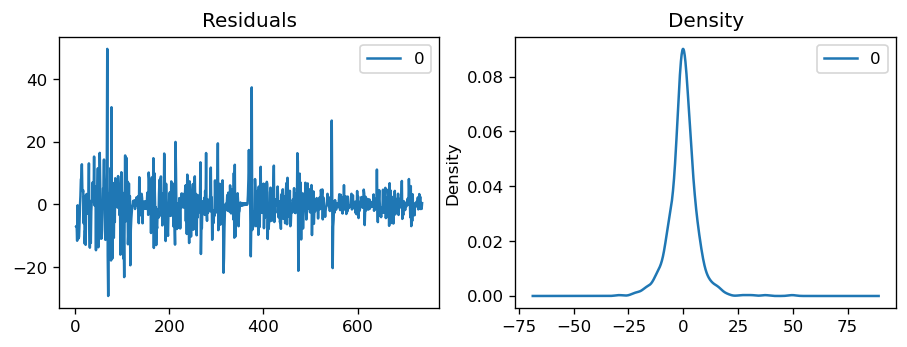

In [22]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

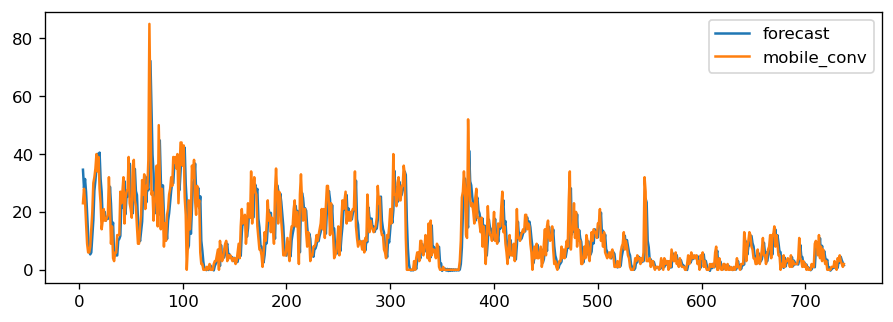

In [23]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## Out of time cross validation 

In [24]:
from statsmodels.tsa.stattools import acf
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = df1.mobile_conv[:600]
test = df1.mobile_conv[600:]



/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


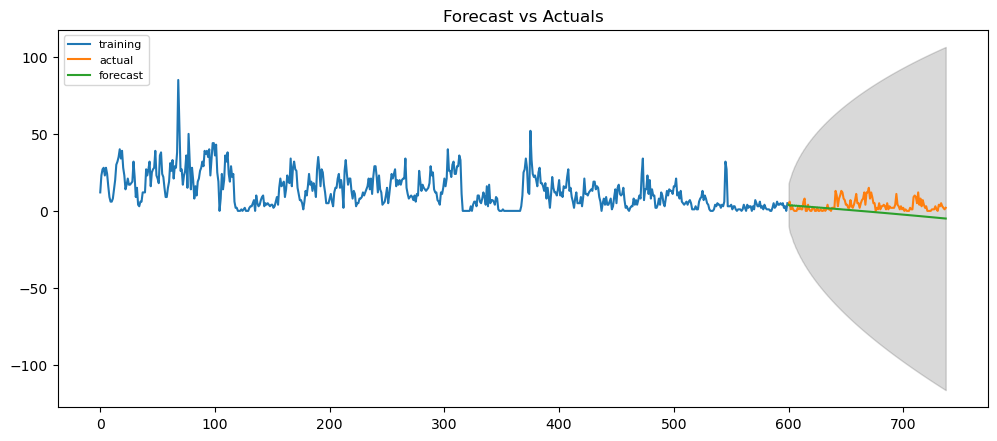

In [26]:
# Build Model
model = ARIMA(train, order=(3, 2, 2)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(138, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Hyperparameters Tuning

In [27]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
p_values=range(0,8)
d_values=range(0,3)
q_values=range(0,5)

In [ ]:
decision=pd.DataFrame()
#decision.column=['error','order']
er=[]
orders=[]
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train,test = df1.mobile_conv[:600],df1.mobile_conv[600:]
            predictions=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    er.append(error)
                    orders.append(order)
                    print('ARIMA%s, MSE= %.2f'% (order,error))
                except:
                    continue
#print(sorted(er)) 
# decision['error']=er
# decision['order']=orders

ARIMA(0, 0, 0), MSE= 103.64
ARIMA(0, 0, 1), MSE= 82.69
ARIMA(0, 0, 2), MSE= 50.35
ARIMA(0, 0, 3), MSE= 42.87
ARIMA(0, 0, 4), MSE= 32.65
ARIMA(0, 1, 0), MSE= 15.08
ARIMA(0, 1, 1), MSE= 13.12
ARIMA(0, 1, 2), MSE= 13.78
ARIMA(0, 1, 3), MSE= 13.76
ARIMA(0, 1, 4), MSE= 13.96
ARIMA(0, 2, 0), MSE= 54.11
ARIMA(0, 2, 1), MSE= 14.93
ARIMA(1, 0, 0), MSE= 23.38
ARIMA(1, 0, 1), MSE= 17.70
ARIMA(1, 0, 2), MSE= 18.44
ARIMA(1, 0, 3), MSE= 18.82
ARIMA(1, 0, 4), MSE= 18.75
ARIMA(1, 1, 0), MSE= 13.20
ARIMA(1, 1, 1), MSE= 14.35
ARIMA(1, 1, 2), MSE= 13.48
ARIMA(1, 2, 0), MSE= 17.59
ARIMA(1, 2, 3), MSE= 13.17
ARIMA(2, 0, 0), MSE= 18.78
ARIMA(2, 0, 1), MSE= 17.80
ARIMA(2, 0, 2), MSE= 18.84
ARIMA(2, 0, 3), MSE= 18.87
ARIMA(2, 1, 0), MSE= 13.53
ARIMA(2, 1, 1), MSE= 13.58
ARIMA(2, 1, 2), MSE= 14.36
ARIMA(2, 2, 0), MSE= 17.04
ARIMA(2, 2, 1), MSE= 13.47
ARIMA(2, 2, 4), MSE= 14.04
ARIMA(3, 0, 0), MSE= 18.69
ARIMA(3, 0, 1), MSE= 18.98
ARIMA(3, 0, 2), MSE= 18.93
ARIMA(3, 0, 4), MSE= 16.39
ARIMA(3, 1, 0), MSE= 13.46


In [ ]:
decision.sort_values(by='error', ascending=True)